In [63]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()


In [59]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

In [30]:
tweets=pd.read_csv('C:\\Users\\Ryan May\\Documents\\Capstone_Two\\tweets.csv', low_memory=False)

In [31]:
users=pd.read_csv('C:\\Users\\Ryan May\\Documents\\Capstone_Two\\users.csv', low_memory=False)

In [32]:
tweets.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

In [33]:
users.columns

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 14 columns):
id                  393 non-null float64
location            285 non-null object
name                384 non-null object
followers_count     384 non-null float64
statuses_count      384 non-null float64
time_zone           369 non-null object
verified            384 non-null object
lang                384 non-null object
screen_name         454 non-null object
description         339 non-null object
created_at          384 non-null object
favourites_count    384 non-null float64
friends_count       384 non-null float64
listed_count        384 non-null float64
dtypes: float64(6), object(8)
memory usage: 49.7+ KB


In [35]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 16 columns):
user_id                  195417 non-null float64
user_key                 203482 non-null object
created_at               203461 non-null float64
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
tweet_id                 201168 non-null float64
source                   58084 non-null object
hashtags                 203482 non-null object
expanded_urls            203482 non-null object
posted                   203482 non-null object
mentions                 203482 non-null object
retweeted_status_id      39651 non-null float64
in_reply_to_status_id    559 non-null float64
dtypes: float64(7), object(9)
memory usage: 24.8+ MB


In [36]:
tweets['created_str']=pd.to_datetime(tweets['created_str'])

In [37]:
users['created_at']=pd.to_datetime(users['created_at'])

In [38]:
tweets['month_tweeted']=tweets['created_str'].dt.month

In [39]:
tweets['year_tweeted']=tweets['created_str'].dt.year

In [40]:
tweets=tweets[~tweets.text.isnull()]
tweets.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,month_tweeted,year_tweeted
0,1868981054.000000,ryanmaxwell_1,1458671502000.000000,2016-03-22 18:31:42,nan,NaN,nan,#IslamKills Are you trying to say that there w...,712346027861405696.000000,NaN,"[""IslamKills""]",[],POSTED,[],nan,nan,3.000000,2016.000000
1,2571870453.000000,detroitdailynew,1476133020000.000000,2016-10-10 20:57:00,0.000000,False,0.000000,"Clinton: Trump should’ve apologized more, atta...",785584942356967424.000000,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],nan,nan,10.000000,2016.000000
2,1710804738.000000,cookncooks,1487767423000.000000,2017-02-22 12:43:43,nan,NaN,nan,RT @ltapoll: Who was/is the best president of ...,834383165359788032.000000,NaN,[],[],POSTED,[],nan,nan,2.000000,2017.000000
3,2584152521.000000,queenofthewo,1482764801000.000000,2016-12-26 15:06:41,nan,NaN,nan,RT @jww372: I don't have to guess your religio...,813400649912217600.000000,NaN,"[""ChristmasAftermath""]",[],POSTED,[],nan,nan,12.000000,2016.000000
4,1768259989.000000,mrclydepratt,1501986984000.000000,2017-08-06 02:36:24,nan,NaN,nan,RT @Shareblue: Pence and his lawyers decided w...,894024327049363456.000000,NaN,[],[],POSTED,[],nan,nan,8.000000,2017.000000


In [41]:
n_tweets=len(tweets.tweet_id)
n_users=tweets.user_id.unique().size
print(n_users)
print(n_tweets)

394
203461


In [42]:
user_grp=tweets.groupby('user_key')

In [43]:
tweet_count=user_grp.tweet_id.count()

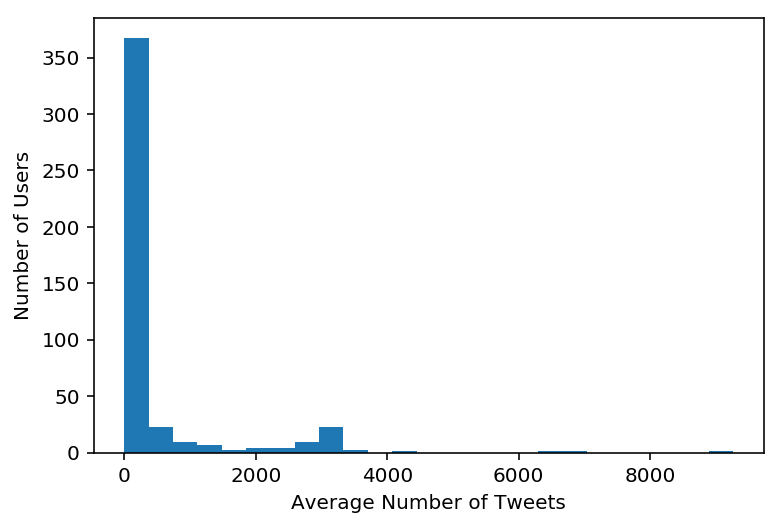

In [77]:
plt.hist(tweet_count, bins=25)
plt.xlabel("Average Number of Tweets")
plt.ylabel("Number of Users")
plt.show()

In [45]:
n_users_id=users.id.unique().size
print(n_users_id)

394


In [46]:
fav_count=len(users.favourites_count)

In [47]:
user_id=users.groupby('id')

In [48]:
favorites_count=user_id.favourites_count.count()

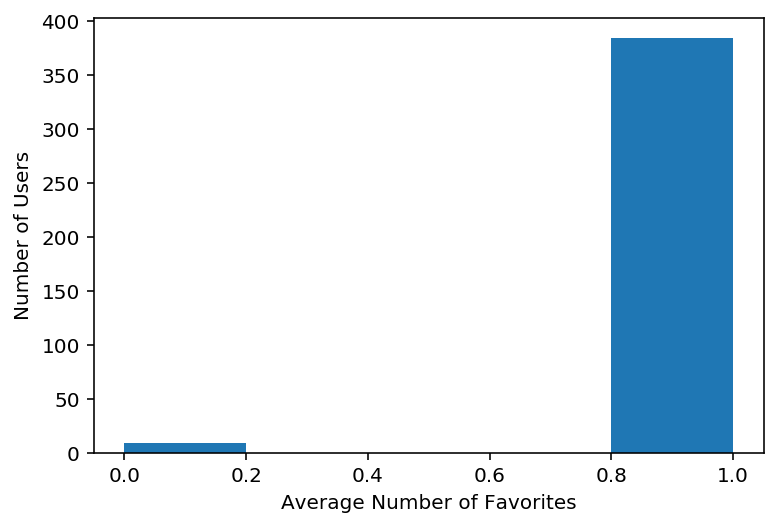

In [78]:
plt.hist(favorites_count, bins=5)
plt.xlabel("Average Number of Favorites")
plt.ylabel("Number of Users")
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=0)

In [83]:
def make_xy(tweets, vectorizer=None):
    if vectorizer is None:
        vectorizer=CountVectorizer()
    X=vectorizer.fit_transform(tweets.text)
    X=X.tocsc()
    y=(tweets.favorite_count).values.astype(np.int)
    return X,y
X,y=make_xy(tweets)